In [10]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# custom analysis tools
from analysis.scan import scan
from analysis.tools import plot_it
from analysis.tools import get_diff
from analysis.tools import extract_species

# system modules
from IPython import get_ipython
import os

plt.rcParams['figure.figsize'] = 20, 10
plt.style.use('dark_background')

In [11]:
STUDY = 'master_neutrons'

# Get the current directory where the Jupyter Notebook is located

current_directory = get_ipython().run_line_magic('pwd', '')

# Extract the local path to 3CS folder
local_path        = current_directory.split('repo_note3cs')[0]

# Define path to study within data3cs folder
path_to_study     = f'repo_data3cs/data3cs/studies/{STUDY}'

# Final path
path              = f'{local_path}{path_to_study}'

In [12]:
# References
ZnO                      = extract_species(path, 'ZnO')
ZnO_samples        = ['ZnO_B3_500', 'ZnO_B3_501', 'ZnO_B3_502']
ZnO_pr                 = {'400' : 12.08}

h2o                      = extract_species(path, 'H2O')
h2o_samples       = ['h2o']
h2o_pr                 = {'420' : 11.87}

Qz_wl                    = extract_species(path, 'Qz_wl')
Qz_wl_samples      = ['qz_wl']
Qz_wl_pr               = {'300': 13.14 , '350' :  12.12, '400' : 12.08 , '450' : 11.57 , '500' : 10.96, '550' : 10.52, '600' : 9.99}


# Irradiation group
LiF_irrad                = extract_species(path, 'LiF', ext='irrad') 
LiF_irrad_samples = ['LiF_B1_131', 'LiF_B2_145', 'LiF_B2_157', 'LiF_B2_158']
LiF_irrad_pr            = {'260' : 12.7, '435' : 11.7}

BaF_irrad                = extract_species(path, 'BaF', ext='irrad') 
BaF_irrad_samples = ['BaF_B2_181','BaF_B2_183', 'BaF_B2_185', 'BaF_B2_192']
BaF_irrad_pr           = {'250' : 12.2, '320' : 13}

Qz_irrad                   = extract_species(path, 'Qz', ext='irrad') 
Qz_irrad_samples    = ['Qz_B2_063', 'Qz_B2_067', 'Qz_B2_069', 'Qz_B2_072']
Qz_irrad_pr              = {'250' : 12.2}

SP_irrad                   = extract_species(path, 'SP', ext='irrad') 
SP_irrad_samples     = ['SP4500', 'SP4501', 'SP4502', 'SP4503']
SP_irrad_pr               = {'250' : 12.2}

# Control group
LiF_ctrl                     = extract_species(path, 'LiF', ext='ctrl') 
LiF_ctrl_samples      = ['LiF_B1_130', 'LiF_B2_143', 'LiF_B2_155']
LiF_ctrl_pr                = {'260' : 12.7, '435' : 11.7}

BaF_ctrl                     = extract_species(path, 'BaF', ext='ctrl') 
BaF_ctrl_samples     = ['BaF_B2_182','BaF_B2_188', 'BaF_B2_193']
BaF_ctrl_pr                = {'250' : 12.2, '320' : 13}

Qz_ctrl                        = extract_species(path, 'Qz', ext='ctrl') 
Qz_ctrl_samples         = ['Qz_B2_064', 'Qz_B2_064', 'Qz_B2_071']
Qz_ctrl_pr                  = {'250' : 12.2}

SP_ctrl                        = extract_species(path, 'SP', ext='ctrl') 
SP_ctrl_samples         = ['SP4504']
SP_ctrl_pr               = {'250' : 12.2}

In [13]:
def gauss_sig(x, A, s, m):
    return A * (np.exp(-(x-m)**2/(2*(s**2))))

def gaussian_template(s):

    size = int(s*3.5)
    
    def gauss(x, s):
        m = int(size/2)
        A = 1 / (s * np.sqrt(2 * np.pi))
        return A * (np.exp(-(x-m)**2/(2*(s**2))))
    
    x_arr              = np.arange(0,size)
    gauss_array = np.array([gauss(x,s) for x in x_arr])
    
    return gauss_array

In [14]:
Qz_irrad

{'coll1': {'Qz_B2_069_A': <analysis.scan.scan at 0x7f79e0c20310>,
  'Qz_B2_063_A': <analysis.scan.scan at 0x7f79e0c20430>,
  'Qz_B2_072_A': <analysis.scan.scan at 0x7f79e0c201f0>,
  'Qz_B2_067_A': <analysis.scan.scan at 0x7f79e0c202b0>},
 'coll2': {'Qz_B2_069_A': <analysis.scan.scan at 0x7f79e0c20640>,
  'Qz_B2_063_A': <analysis.scan.scan at 0x7f79e0c208e0>,
  'Qz_B2_072_A': <analysis.scan.scan at 0x7f79e0b4a020>,
  'Qz_B2_067_A': <analysis.scan.scan at 0x7f79e0b49480>},
 'coll3': {'Qz_B2_069_A': <analysis.scan.scan at 0x7f79e0b48430>,
  'Qz_B2_063_A': <analysis.scan.scan at 0x7f79e0b484c0>,
  'Qz_B2_072_A': <analysis.scan.scan at 0x7f79e0b48c70>,
  'Qz_B2_067_A': <analysis.scan.scan at 0x7f79e0b48c10>}}

In [39]:
scan1 = SP_irrad['coll1']['SP4503_A']
scan2 = SP_irrad['coll2']['SP4503_A']
scan3 = SP_irrad['coll3']['SP4503_A']

In [35]:
scan1 = Qz_irrad['coll1']['Qz_B2_063_A']
scan2 = Qz_irrad['coll2']['Qz_B2_063_A']
scan3 = Qz_irrad['coll3']['Qz_B2_063_A']

In [42]:
x,y = get_diff(scan1, scan2, '250', '15.0', '0', color = 'yellow', toplot=False);
std = np.std(y[600:700])
std

0.06871582576563327

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


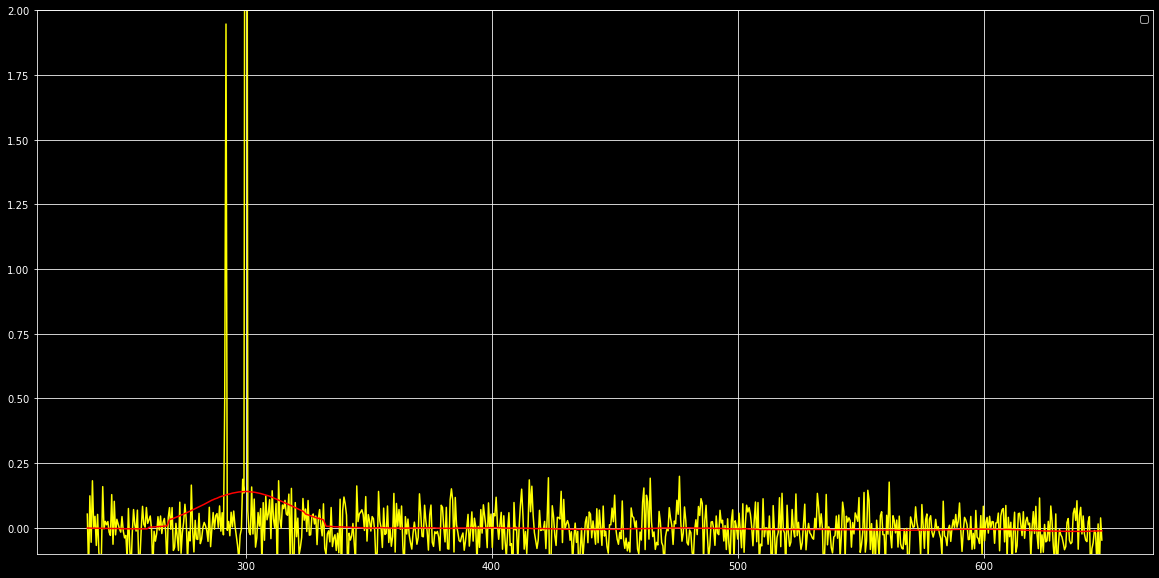

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


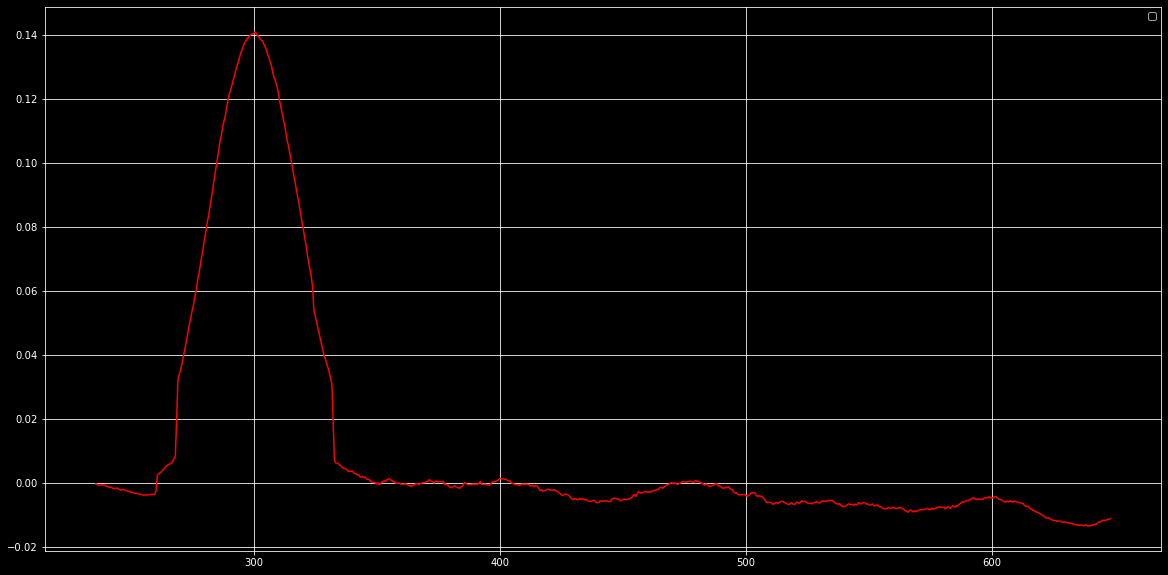

In [17]:
temp = gaussian_template(35)
x,y = get_diff(scan1, scan2, '250', '15.0', '0', color = 'yellow', toplot=False);

# add gaussian signal
A = 0.0; s = 60; m = 500
gauss_arr = np.array([gauss_sig(p, A, s, m) for p in x])
y                 = np.add(y, gauss_arr)

conv_data = signal.convolve(y, temp, mode = 'same')
plt.plot(x,y, color='yellow')
plt.plot(x, conv_data, color = 'red')
plt.grid("on")
plt.ylim(-0.1,2)
plt.legend()
plt.show();

plt.plot(x, conv_data, color = 'red')
plt.grid("on")
plt.legend()

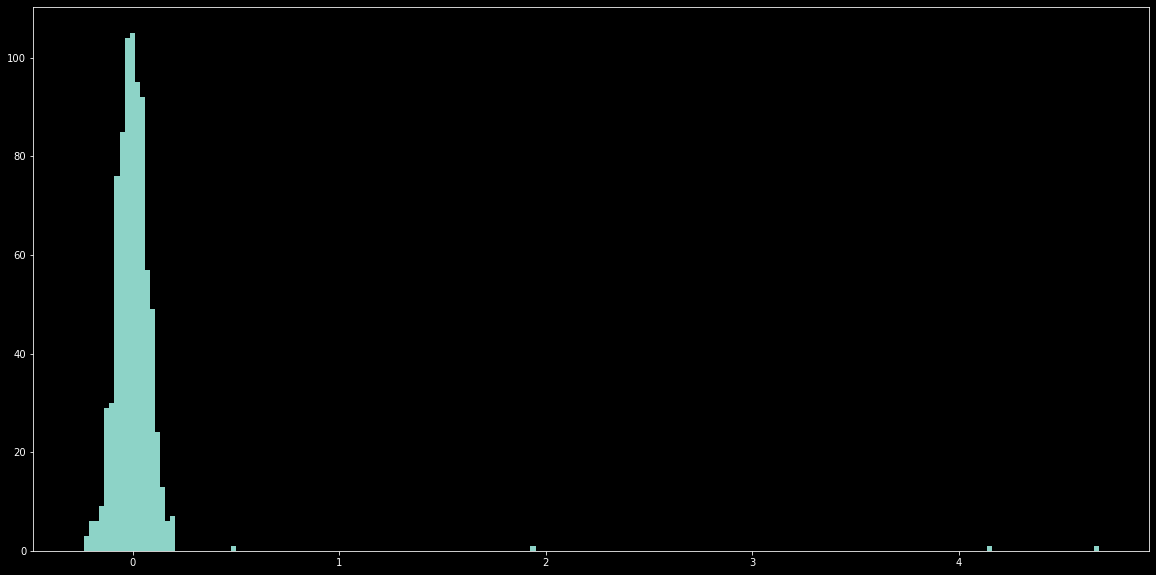

In [18]:
plt.hist(y, bins = 200);

In [19]:
hist = np.histogram(y, bins=100);

In [20]:
hist

(array([  9,  15,  59, 161, 209, 187, 106,  37,  13,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([-0.23627735, -0.18714772, -0.13801809, -0.08888846, -0.03975883,
         0.0093708 ,  0.05850043,  0.10763006,  0.15675969,  0.20588932,
         0.25501895,  0.30414858,  0.35327821,  0.40240783,  0.45153746,
         0.50066709,  0.54979672,  0.59892635,  0.64805598,  0.69718561,
         0.74631524,  0.79544487,  0.8445745 ,  0.89370413,  0.94283376,
         0.99196339,  1.04109302,  1.09022264,  1.13935227,  1.188481

In [21]:
def muon_filter(input, thresh=1,bins = 100):

    array = input.copy()
    
    hist = np.histogram(array, bins)
    muon_values = []

    for i in range(len(hist[0])):
        if   0 < hist[0][i] <= thresh:
            muon_values.append([hist[1][i], hist[1][i+1]])

    print(f'Found {len(muon_values)} muons')


    muon_indices = []
    # run through muon intervals
    for tup in muon_values:
        a = tup[0]; b = tup[1]

        # now loop the array to find this element
        for i in range(len(array)):
            if a <= array[i] <= b : 
                muon_indices.append(i)
    
    # clean muons
    for i in muon_indices:
            array[i] = 0
        
    return array

Found 4 muons


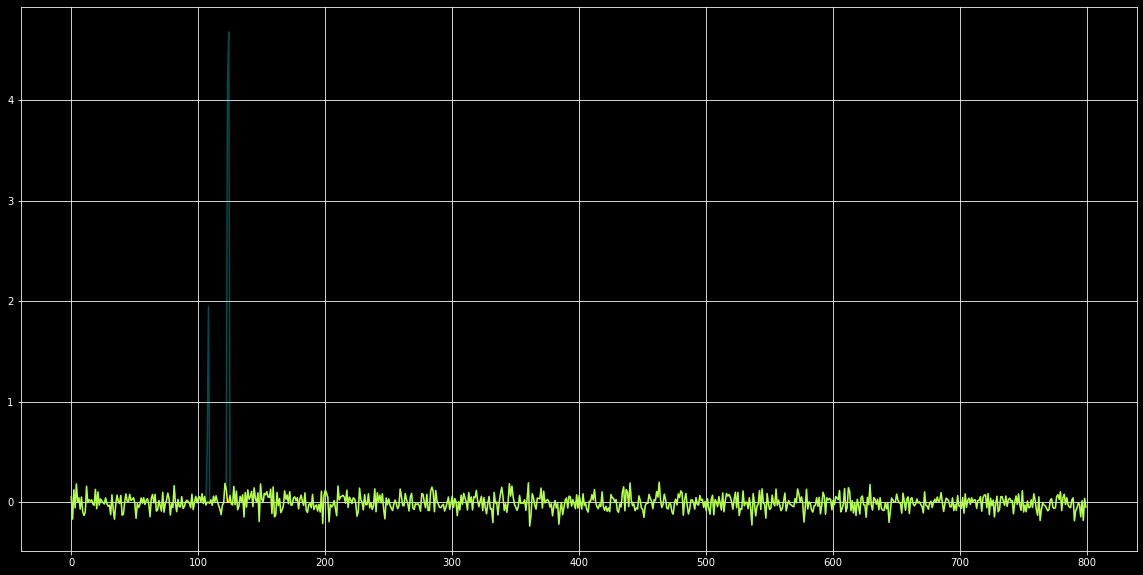

In [22]:
new_y = muon_filter(y, thresh = 1)
plt.plot(new_y, color = 'yellow')
plt.plot(y, alpha = 0.3, color='cyan')
plt.grid("on")

In [23]:
np.std(new_y)

0.0729994487336033

In [266]:
np.round(1.9254263429960976,8)

1.92542634

In [119]:
import numpy as np

# Your NumPy array
my_array = y

# Value to locate
value_to_find = 4.67668558

# Find the indices of the value in the array
indices = np.where(np.isclose(my_array, value_to_find, atol=1e-6))[0]

if indices.size > 0:
    print(f"The indices of {value_to_find} are {indices}")
else:
    print(f"{value_to_find} not found in the array")

The indices of 4.67668558 are [124]
